In [14]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
import pandas as pd
from settings import SONGS_PATH
import glob
import os

dfs = []

for file in glob.glob(os.path.join(SONGS_PATH, "*.csv")):
    df = pd.read_csv(file)

    filename = os.path.basename(file)
    date = os.path.splitext(filename)[0]
    
    # Agregar columna con el nombre del archivo
    df['fecha'] = date
    
    dfs.append(df)

# Concatenar todos los DataFrames
df = pd.concat(dfs, ignore_index=True)

# Parsear día y hora
df['fecha'] = pd.to_datetime(df['fecha'], format='%d-%m-%Y')
df['hora'] = pd.to_timedelta(df['hora'])
df['fecha'] = df['fecha'] + df['hora']
df.drop(columns='hora', inplace=True)

df.head()

,artista,cancion,fecha
0,DONNA LEWIS,I COULD BE THE ONE,2026-01-01 00:00:00
1,FOREIGNER,URGENT,2026-01-01 00:03:16
2,TAYLOR SWIFT,BLANK SPACE (TAYLOR'S VERSION),2026-01-01 00:07:37
3,DAVID BOWIE,LET'S DANCE,2026-01-01 00:11:57
4,KOLUMBIA,GENIO,2026-01-01 00:16:18


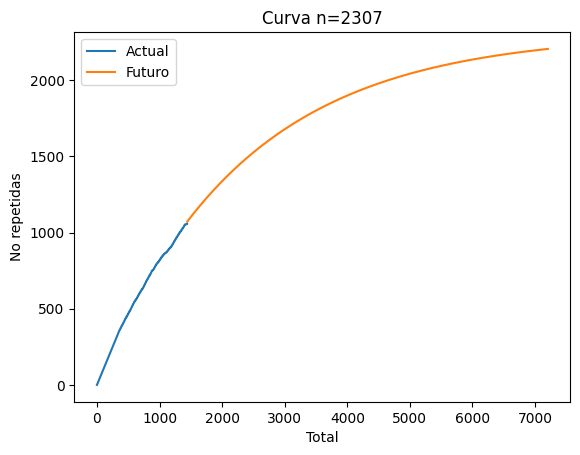

In [16]:
from analysis import plot_curve

plot_curve(df)

In [7]:
df_counts = df.groupby(['artista', 'cancion']).size().reset_index(name='counts')
df_counts.head()

'''
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df_counts.sort_values('artista'))
'''

print(len(df_counts))
print(len(df))

1058
1438


In [8]:
df_counts.sort_values('counts', ascending=False).head()

,artista,cancion,counts
116,BRITNEY SPEARS,BABY ONE MORE TIME,4
276,EUROPE,CARRIE,4
362,GUNS N' ROSES,PATIENCE,4
983,THE ROLLING STONES,ROCK AND A HARD PLACE,3
482,KOKO STAMBUK,VALIENTE,3


In [19]:
# CON REPETICIONES
df_art = df_counts[['artista', 'counts']].groupby('artista').sum().reset_index()
df_art = df_art.sort_values('counts', ascending=False)
df_art.head(10)

,artista,counts
239,NICOLE,19
128,GEPE,18
156,JAVIERA MENA,18
185,LA LEY,17
210,MADONNA,17
222,MICHAEL JACKSON,17
355,THE ROLLING STONES,16
90,DURAN DURAN,14
202,LOS TRES,14
76,DAVID BOWIE,14


In [17]:
# SIN REPETICIONES
df_art = df_counts[['artista']].groupby('artista').size().reset_index(name='counts')
df_art = df_art.sort_values('counts', ascending=False)
df_art.head(10)

,artista,counts
222,MICHAEL JACKSON,15
210,MADONNA,15
185,LA LEY,13
90,DURAN DURAN,12
128,GEPE,12
156,JAVIERA MENA,11
76,DAVID BOWIE,11
355,THE ROLLING STONES,11
202,LOS TRES,11
239,NICOLE,11


In [18]:
df_counts[df_counts['artista'] == 'QUEEN']

,artista,cancion,counts
746,QUEEN,ANOTHER ONE BITES THE DUST,1
747,QUEEN,BOHEMIAN RHAPSODY,2
748,QUEEN,DON'T STOP ME NOW,1
749,QUEEN,I WANT TO BREAK FREE,1
750,QUEEN,I'M GOING SLIGHTLY MAD,1
751,QUEEN,KILLER QUEEN,2
752,QUEEN,RADIO GA GA,1
753,QUEEN,WE ARE THE CHAMPIONS,2
754,QUEEN,WE WILL ROCK YOU,2


In [11]:
df_app = df.sort_values('fecha').drop_duplicates(subset=['artista'])
df_app.tail(10)


,artista,cancion,fecha
897,MR BIG,TO BE WITH YOU,2026-01-03 13:16:10
898,JET,LOOK WHAT YOUVE DONE,2026-01-03 13:19:26
902,BAD ENGLISH,WHEN I SEE YOU SMILE,2026-01-03 13:35:44
915,WARRANT,HEAVEN,2026-01-03 14:30:15
930,QUEEN & DAVID BOWIE,UNDER PRESSURE,2026-01-03 15:29:08
982,GO GO'S,HEAD OVER HEELS,2026-01-03 19:01:43
1004,PILOT,MAGIC,2026-01-03 20:24:28
1007,GIT,NO HIERAS MI CORAZÓN,2026-01-03 20:37:30
1012,WHAM!,EVERYTHING SHE WANTS,2026-01-03 20:58:08
1043,O.M.D.,ENOLA GAY,2026-01-03 22:59:59
